Importing Neccessary Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading the Training and Testing dataset

In [2]:
Train=pd.read_csv("V1.4_Training.csv",header=None)
Train.sample(10)

0                                                  1  2
512     811_2  "With windows phone 8 (I have a Nokia Lumia 82...  0
6202     3198  "Especially for StringFormatConverter and Form...  0
8239     2231  I have to make a stub of the class in the loca...  0
2738    0_261  "This is unfair to devs and cheapens the Windo...  0
6781     3522  "But either way please do make an API available."  1
7661     6925  I propose you add a proper unit test suite for...  1
136     691_9  "OpenXML SDK Office for WinRT __ Office Primar...  0
4144   0_2053  "Please add wiznote support as you support eve...  1
6088     2845  "I don't know how they achieved this though be...  0
4705  1010_12  "After all, it is so easier to just allow to r...  0

In [3]:
Test=pd.read_csv("SubtaskA_Trial_Test.csv",header=None)
Test.sample(10)

0                                                  1  2
395  158912            "Access to call voice stream in/out 2."  X
400   15904  "Doing something like the actual WebBrowserTas...  X
535   16335          "I believe scrolling should be improved."  X
212   14494  "Add 'open app in marketplace' in the app menu...  X
500  162516  "Examples: Google should be able to add Google...  X
342  155813  "Unless of course we go with a predetermined S...  X
564   16391  "This could be implemented via WiFi, of course...  X
207   14463  "It would be nice if when the app/game is publ...  X
491   16257  "It was available in WM6.5 (and older) so it w...  X
447  160718  "Implementing such protocol is not impossible ...  X

In [4]:
Test[2] = 5
Test.sample(10)

0                                                  1  2
221  14551  "We want an Office Hub that open Openoffice do...  5
45   13381  "This is really important when a same organisa...  5
151  14131  "We need to open our Application, or to overwr...  5
170  14294  "Microsoft boffins showed how they can use aud...  5
385  15892  "A demo or prototype category like it exists o...  5
401  15911  "Add a method to run another app passing params."  5
492  16258                  "allow sync of ms exchange notes"  5
487  16252  "To close an app the user should be able to us...  5
337  15561  "Please upgrade the YouTube App by Microsoft C...  5
171  14295  "I want to use that on the Phone for some games."  5

In [5]:
Eval=pd.read_csv("SubtaskA_EvaluationData.csv",header=None)
Eval.sample(6)

0                                                  1  2
158  3893  Release appx shouldn't have secret keys inside...  X
545  5436  This feature is really usefull in messaging apps.  X
197  4273  Currently the network data flow is boroken onc...  X
167  3991                    you can't scroll at that point.  X
422  5090  Unfortunately access is ONLY guaranteed via St...  X
109  3253  Are there any plans to support skeleton tracki...  X

In [6]:
Eval[2] = 6
Eval.sample(10)

0                                                  1  2
729  5991  APIs do not support the configuration of the w...  6
513  5313  This means that we are forces to use the Coded...  6
369  9104  Me and two friends of mine created an app that...  6
417  5078  We want to tag the location but GPS takes long...  6
592  5565  If this is going to continue then windows will...  6
777  6152  But unfortunately this is application wide and...  6
757  6084                                 I think its a bug.  6
368  8858  If the Phone doesn't have an accurate location...  6
638  5703  Also the WebView allows scripts from any sourc...  6
134  3574  Developers need to have good and deep understa...  6

# Combining the Datasets

To reduce the number of Operations and operate on all sets

In [7]:
combDf = Train.append([Test,Eval], ignore_index=True)
combDf.sample(10)

0                                                  1  2
437   792_25  "- Boolean AdaptItemHeight - Integer MaxNumber...  0
4655   998_1                  "Still not supporting Windows 7?"  0
8280    2337  TM do depth writes and depth tests but they do...  0
2097  1756_1  "Marketplace policy requires music apps to pop...  0
6137    2994  "This means the task can not execute for the f...  0
3193   0_772  "We cannot download/pay for the apps, submit a...  0
5609    1224  "These are the APIs that ought to be allowed i...  0
4649  995_18  "Back in the Windows Mobile/CE days, Microsoft...  0
3858  0_1762  "Since you can integrate with Twitter, it woul...  1
7257     694           (It's does with Html but not with Text.)  0

# Labelling the Columns

To visualize clearly

In [8]:
combDf.columns=['ID','Sentence','Prediction']
combDf.sample(10)

ID                                           Sentence  Prediction
9855    6098  if the location is slightly on the right the r...           6
4063  0_1972  "You can launch Safari from the internal butto...           0
460    796_3  "HOWEVER, apps with in-app purchases are not e...           0
3358   0_951  "Please do study this post I did about the "Br...           0
4079  0_1988  "Something similar to flipboard's functionalit...           0
1861  1690_8  "Currently, serialization and deserialization ...           0
6991    4499  "I think Microsoft needs OR boost XAML develop...           1
1662  1549_5  "Maybe a theme that just picks colours from th...           0
1696  1567_8  "The application would receive the decoded inf...           0
2583    0_83  "The older tooling (AppDeployCmd.exe) would al...           0

# Missing values check:

If there is no value present then we cannot train our model.

In [9]:
print(combDf["Prediction"].unique())
combDf.describe(include=['O'])

[1 0 5 6]


ID                                           Sentence
count   9925                                               9925
unique  9271                                               9925
top      616  "My app users are reporting that they can't ge...
freq       2                                                  1

In [10]:
combDf.shape

(9925, 3)

In [11]:
word_count=pd.value_counts(combDf['Prediction'].values, sort=False)
print(word_count)
word_count=word_count[:2]

0    6415
1    2085
5     592
6     833
dtype: int64


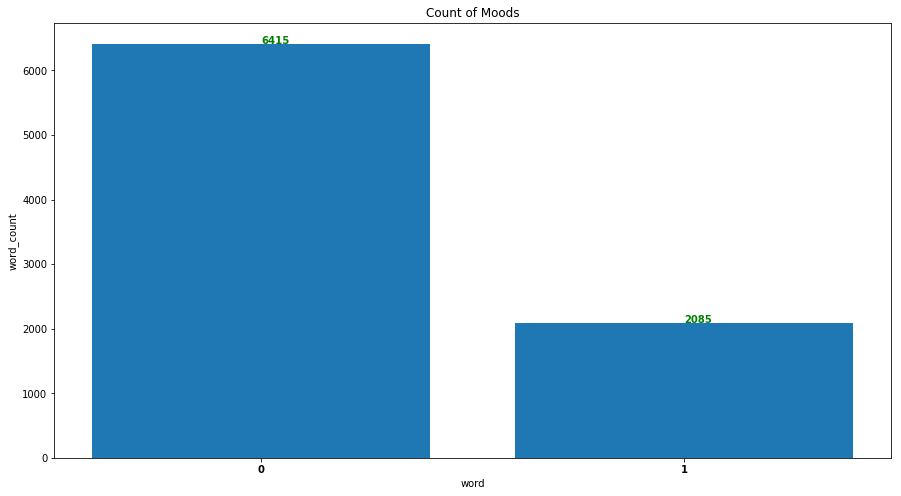

In [12]:
Index = [1,2]
plt.figure(figsize=(15,8))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,[0,1], fontweight='bold')
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')

# Conveting the sentence to LowerCase

In [13]:
combDf["Sentence"] = combDf["Sentence"].str.lower()
combDf.sample(7)

ID                                           Sentence  Prediction
2004  1731_1                                "we will be happy."           0
8514  131912  "you can put other apps in one folder, and put...           5
4490   966_7  "just wanted to throw that out there, it has o...           0
7439    1130  but rendertargetbitmap api doesn't work in bac...           0
6469    3877  "i can't understand why i'm confused in this s...           0
3280   0_868  "there are situations in which it's necessary ...           0
2353  1826_1  "this makes visual studio fail to start the de...           0

# Defining function to remove patterns 

In [14]:
import re
def remove_pat(s1, pat, nstr):
    return re.sub(pat, nstr, s1)

# Removing special Characters

In [15]:
combDf["New"] = np.vectorize(remove_pat)(combDf["Sentence"], "[^a-zA-Z#]+", " ")
combDf.sample(10)

ID                                           Sentence  Prediction  \
7521     1332  according to the singular post i was able to f...           0   
5874     2165  "nevertheless so far this is ok and could be c...           0   
5529      992                        "m$ just displays 4 lines."           0   
4323   926_11              "facing problem while i open my app."           0   
763     868_4  "the photo app on windows 8 is not nearly good...           0   
2414   1848_1  "is it possible to put something like microsof...           0   
5144     2868  "with suppresssystemoverlays you can still for...           1   
1709   1581_3  "others are having the same problem: http://st...           0   
6502     4001  "this is really way too long in uwp xaml not a...           0   
1739  1600_11  "you shouldn't be charging $99 for service lik...           1   

                                                    New  
7521  according to the singular post i was able to f...  
5874   nevertheless so far this is ok and could be c...  
5529                             m just displays lines   
4323                facing problem while i open my app   
763    the photo app on windows is not nearly good e...  
2414   is it possible to put something like microsof...  
5144   with suppresssystemoverlays you can still for...  
1709   others are having the same problem http stack...  
6502   this is really way too long in uwp xaml not a...  
1739   you shouldn t be charging for service like this

#  Removing the words whose lengths are less than 3

In [16]:
combDf["New"] = np.vectorize(remove_pat)(combDf["New"], r"\b[a-z]{1,2}\b", " ")
combDf.sample(10)

ID                                           Sentence  Prediction  \
6221     3226  "i couldn't find anything in the release notes...           0   
6195     3181  "now i can create an attached property and ass...           0   
170     703_2  "the trial feature should be built-in with aut...           1   
9587     5265  while debugging if you click suspend the app a...           6   
1437  1440_11        "if not, what is the recommended solution."           0   
8761    15076  "it would be more useful if specific service a...           5   
6128     2953                      "infinite loop reproduction."           0   
7626     6742  that would take your default language descript...           0   
7616     1556  is this possible to use this feature in our wi...           0   
8200     2154  this is what the screen looks like: https://1d...           0   

                                                    New  
6221     couldn   find anything   the release notes ...  
6195   now   can create   attached property and assu...  
170    the trial feature should   built   with autom...  
9587  while debugging   you click suspend the app an...  
1437               not what   the recommended solution   
8761     would   more useful   specific service apps...  
6128                        infinite loop reproduction   
7626  that would take your default language descript...  
7616    this possible   use this feature   our windo...  
8200  this   what the screen looks like https drv   ...

# Combining all sentences

In [17]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in combDf['New']])
all_words

' please enable removing language code from the dev center language history for example   you ever selected   and     laguages and you published this xap   the store then   causes tile localization   show the     default tile localization which   bad   note   your csproj file there     supportedcultures entry like this supportedcultures           supportedcultures when   removed the   language code and published   new xap version the old xap version still remains   the store with replaced and unpublished   wich means the new version not fully replaced the old version and this causes   very serious problems   some     users will still receive the old xap version     app   the store randomly gives the old xap   the new xap version     app     app has     version and     version xap   the same submission   the   xap works only     and the   xap works only for     sometimes the store gives the wrong   xap version     app   windows phone users     should     option   remove the   language c

# Removing Stop Words

Stop words are useless words

In [18]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(all_words) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  
print(filtered_sentence) 

['please', 'enable', 'removing', 'language', 'code', 'dev', 'center', 'language', 'history', 'example', 'ever', 'selected', 'laguages', 'published', 'xap', 'store', 'causes', 'tile', 'localization', 'show', 'default', 'tile', 'localization', 'bad', 'note', 'csproj', 'file', 'supportedcultures', 'entry', 'like', 'supportedcultures', 'supportedcultures', 'removed', 'language', 'code', 'published', 'new', 'xap', 'version', 'old', 'xap', 'version', 'still', 'remains', 'store', 'replaced', 'unpublished', 'wich', 'means', 'new', 'version', 'fully', 'replaced', 'old', 'version', 'causes', 'serious', 'problems', 'users', 'still', 'receive', 'old', 'xap', 'version', 'app', 'store', 'randomly', 'gives', 'old', 'xap', 'new', 'xap', 'version', 'app', 'app', 'version', 'version', 'xap', 'submission', 'xap', 'works', 'xap', 'works', 'sometimes', 'store', 'gives', 'wrong', 'xap', 'version', 'app', 'windows', 'phone', 'users', 'option', 'remove', 'language', 'code', 'app', 'language', 'history', 'opti

# Creating Frequency List 

In [20]:
import nltk
freq = nltk.FreqDist(filtered_sentence) 
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

please:459
enable:80
removing:16
language:94
code:268
dev:133
center:104
history:33
example:224
ever:26
selected:50
laguages:4
published:40
xap:28
store:427
causes:28
tile:93
localization:16
show:155
default:96
bad:48
note:36
csproj:2
file:295
supportedcultures:3
entry:21
like:843
removed:27
new:360
version:185
old:60
still:143
remains:12
replaced:11
unpublished:4
wich:9
means:66
fully:31
serious:17
problems:46
users:275
receive:39
app:1628
randomly:8
gives:30
submission:34
works:111
sometimes:52
wrong:51
windows:1189
phone:734
option:215
remove:74
completly:4
replace:15
prevoius:2
currently:337
mistakenly:1
situation:22
forever:3
live:86
displayed:54
russian:4
english:22
one:428
publish:22
update:173
truble:2
deliver:6
write:58
lot:137
support:387
ticket:4
really:170
cares:4
issue:151
engineering:3
team:31
solve:15
following:57
provide:199
workaround:16
need:320
culture:7
way:378
posted:13
add:459
implement:72
appreslib:4
dll:15
xxxx:4
mui:4
documentation:39
exist:30
http:175
msdn:69


systems:18
enterprise:25
signed:15
touch:55
kiosk:5
machine:36
usb:36
installation:22
payoneer:1
earnings:1
attachment:6
grip:1
xperia:1
snapdragon:1
recording:15
require:23
factory:9
createwicbitmaprendertarget:1
strangely:2
supported:76
rendering:21
direct:26
quote:3
oem:2
docs:24
welcome:5
drivers:16
umdf:6
syntax:3
kmdf:1
makers:4
oems:1
becoming:6
pcs:4
hardware:53
extensions:21
structure:3
sensor:4
designed:13
iphone:36
safe:18
harming:2
thus:16
guarding:1
penetrating:1
registered:12
driver:29
approval:3
mentioned:11
downloaded:28
typically:5
delay:10
hrs:2
per:38
amazing:10
performing:5
blazing:1
speeds:5
benchmarked:1
management:24
place:57
albeit:2
dashboard:37
reporting:12
somebody:4
accountable:1
attention:10
date:45
frozes:1
hangs:4
big:37
happens:37
clicking:17
opens:23
linking:5
except:14
dial:4
pad:2
shown:48
hav:2
jack:4
adds:11
msn:3
cell:7
observations:1
gets:42
hang:3
receiving:7
cells:1
rings:4
normally:15
pickup:2
state:43
force:21
mute:11
smoothly:5
ringer:13
mute

stymied:1
restriction:9
limitation:22
basically:14
aside:3
somewhat:5
draconian:1
disallow:3
looking:39
man:1
remind:4
ssl:11
tls:2
socket:14
component:18
pinning:10
created:48
chain:15
individual:16
stackoverflow:11
questions:13
stuck:10
development:49
restricting:1
clients:19
appliances:1
manufacturing:1
insist:1
regular:18
verge:3
suggest:39
battery:33
consumption:4
generation:6
asked:15
dir:3
opposite:4
greater:11
processes:5
corrupted:2
setup:14
wizard:7
finished:7
hidden:14
excellent:14
monitor:9
lack:13
raw:7
listen:10
incomming:3
connections:13
paired:2
bluetooth:38
smart:16
watch:14
disconnected:2
timed:2
presses:3
handles:8
involved:2
trigger:18
listening:10
spp:1
drain:4
comming:1
accessories:3
compile:16
shaders:3
runtime:27
huge:16
inconvenience:1
angle:3
producing:1
compliant:4
opengl:2
port:30
strength:6
distance:3
positioning:6
aera:1
ibeacon:1
recieve:1
scheduled:6
meetings:1
linked:4
yahoo:3
instances:6
audiovideocapturedevice:2
dispose:4
deactivated:3
disposal:2
situ

cnet:1
soundwave:2
kinect:6
skips:1
cameras:7
undesired:1
additionally:3
exposes:5
isolated:17
ensure:17
myappchooser:1
chooser:4
myapplauncher:1
launcher:26
kick:2
playmusic:1
showfeed:1
leverage:6
launchers:7
choosers:2
hls:7
becomes:16
recommended:8
owners:1
plugin:25
naturally:2
flv:17
swf:1
avi:5
mpeg:4
ect:3
widely:4
among:7
renowned:1
advertise:3
discount:2
besides:5
viewers:3
href:4
kvisoft:7
convert:27
converter:14
powerful:19
converting:13
tutorials:8
conversion:18
breeze:3
inserting:4
watermark:5
regulate:1
saturation:1
split:6
clip:4
merge:4
img:3
farm:1
staticflickr:1
feca:1
jpg:7
picturehub:1
udp:9
broadcast:5
upnp:8
multicast:4
debugging:26
debugger:8
executed:9
artists:2
joe:1
speech:11
role:9
education:3
helping:6
visually:5
impaired:1
living:4
sapi:5
voices:2
extending:5
sortable:1
observable:1
sorry:8
abillity:2
crucial:5
bicycle:2
repair:2
shop:3
australia:1
denmark:2
nearby:3
guess:11
visited:2
sunglasses:1
town:1
relevant:15
darn:1
overlook:1
fastest:7
cheapest:1


intuitive:3
substantial:1
entered:8
likely:8
instinctively:1
shorter:3
confuse:1
unecessary:1
friction:1
sip:8
portrait:1
vertical:8
scrollbar:14
latter:2
locking:6
described:7
alternatively:4
consistent:5
placed:10
viewport:1
ahead:3
periodically:7
cancelled:2
self:9
authority:1
servicepointmanager:1
accepted:4
authorities:1
cacert:1
recur:1
agents:4
midroll:1
advertisments:1
mediaelements:1
numeric:7
passwords:8
unified:5
keys:23
clumsy:2
backspace:2
arrows:3
multiscaleimage:2
aviation:1
commercial:6
aircraft:1
illegal:1
rural:1
inappropriate:2
prerogative:1
pan:4
factor:14
compact:10
steap:1
curve:6
gui:8
quicker:3
plumbing:2
hobbyist:1
detailed:6
capabilty:1
flag:6
vba:1
brick:1
realize:4
dependent:7
droid:4
webbased:1
oses:1
bypass:4
birds:1
eye:5
mobiles:2
relief:1
recurring:4
bothering:1
surely:3
ideology:1
estate:4
distinguish:2
filtering:9
categories:10
blacklisting:1
rankings:1
avoided:2
scanning:3
addiction:1
vanished:1
trickery:1
exif:3
prserve:1
manipulation:5
defaultitem:

wrappers:3
dozens:3
shortly:2
listings:8
warns:2
rules:5
ban:1
banned:1
counts:2
quantity:1
outperform:1
shapes:6
directx:11
dirextx:2
modelling:2
cons:2
pros:1
richness:1
possibilities:8
cube:2
shocked:1
lows:1
drawing:4
intercept:4
phonecallorigin:4
phonecallhistoryentry:2
temperature:6
disk:18
consume:4
utilization:1
bindingexpression:1
updatetarget:1
moldova:5
mil:2
relation:2
neighbors:1
coverage:1
dive:1
gadgets:2
commerce:4
formal:4
postal:4
instrument:5
president:2
elementary:3
school:9
student:6
redesign:2
loves:2
wire:3
partner:3
outsourced:2
cleanness:1
geographic:2
overhead:10
continually:2
forgetting:1
arriving:2
parents:1
crossing:1
geofence:1
modes:3
broadband:1
pavstar:1
multichannel:2
downmixed:1
receivers:3
ton:1
alternates:2
breakes:2
throttling:1
dropouts:1
emulating:1
splitview:17
pane:12
paneplacement:6
targetting:2
thin:2
horizontal:15
resolution:14
rig:1
getscheduledtoastnotifications:1
affect:4
translators:2
pasting:5
linguist:2
honestly:3
learned:3
grammar:5
j

presentations:1
touchshow:1
disappointed:2
rank:1
judge:1
effectiveness:1
marketing:4
dismiss:1
kid:2
swipes:5
resourcedictionary:2
ite:1
supposes:1
harm:1
dlls:3
xxx:1
thirdparty:1
secured:3
nested:2
virtualization:7
infinitely:2
capitol:1
puts:4
capitols:1
soo:1
nerves:1
scoped:3
critical:7
workspace:1
declare:2
onclick:2
presed:2
toggles:1
unmute:1
competitive:2
expedite:2
triaged:1
responded:1
commenters:1
professionals:1
pho:1
vista:1
adoption:4
ultimately:1
compare:6
viber:1
oovoo:1
execution:5
mix:2
mixradio:1
pauses:1
clue:1
early:9
tilt:1
rotate:2
uesr:2
surname:2
aggregation:1
datasource:5
criteria:5
tester:6
supervisor:1
actively:1
observe:2
simultaneously:1
resuming:3
dunaway:1
agreed:1
misreading:1
kidscorner:5
bachelors:1
debit:2
renewals:2
viewmodel:6
offense:1
imaging:4
devicenetworkinformation:2
iswifienabled:1
independently:1
retain:3
medialibraryextensions:3
savesong:3
renaming:7
discussed:3
eeb:1
navigationservice:2
geocoordinatewatcher:2
outdor:1
disiredaccuray:1
d

preparing:3
verbose:10
vfs:4
wildcard:4
locationglobber:1
ischildnameamatch:1
psobject:1
childobject:1
wildcardpattern:3
ismatch:2
overrun:5
pdacl:4
writable:5
aclsize:5
psacl:2
newacl:2
neo:3
stations:2
orbits:2
orbital:2
coreapplication:2
requestrestartasync:2
notinforeground:2
collapsing:2
stepforwardoneframe:2
stepbackoneframe:2
pathfigure:4
clipping:3
connecting:3
cisco:2
anyconnect:2
looses:2
premier:4
incidents:2
windowsserver:2
nat:3
architectural:5
possibile:2
lives:2
winzip:2
minconnectioninterval:2
maxconnectioninterval:2
slavelatency:2
supervisory:2
compendium:2
rolled:2
joke:2
anybody:2
folderpicker:3
iniative:1
differ:2
glad:1
neighboringfilesquery:4
indexer:5
getpropertiesasync:2
indexed:2
indexing:2
ssd:3
imageproperties:2
uncommon:3
tooltipservice:2
tooltip:4
vertically:3
recognised:1
boom:2
sooo:2
inkcanvas:2
inking:6
analysis:6
masterview:3
pulltorefresh:2
slidablelistitem:2
linker:3
traced:2
connectasync:2
referencing:3
reverted:2
numericupdowncontrol:2
consumes:1
h

msft:1
reschedule:1
whiteboard:1
resizes:1
registers:1
dolphins:1
membership:3
directdraw:1
broader:1
prove:2
competitor:1
showgridlines:1
removes:1
unregistered:1
adopter:1
dirtbags:1
asdfasdfasdf:1
exploration:1
chrashing:1
mapper:1
joyxoff:1
suite:2
killing:1
dwm:1
rotated:1
oom:1
exempt:1
exemple:1
bluethooth:1
attractive:4
cummulative:1
ceirtain:1
charmap:1
serialcommunication:1
internally:3
aarnott:1
commit:1
mybutton:1
mistyped:1
neck:1
windowsml:1
machinelearning:1
specificly:1
setttings:1
isloading:2
shortened:1
quoted:2
sink:2
citing:1
rfcomm:1
mom:1
dad:1
inputbox:1
migrating:3
dongle:1
hci:1
conncetion:1
explicitly:4
lsof:1
identified:3
precedent:1
isalnum:1
codepages:1
abo:1
printerextensionlibrary:1
hereby:1
reccomends:1
begging:1
hates:1
recommends:1
mmsecurevirtualmemoryagainstwrites:1
idealy:1
propertyname:1
investigate:2
unintentionally:1
modal:3
organic:1
overs:1
seekbar:3
wherver:1
accordingly:2
successes:1
seee:1
otler:1
ore:1
gona:1
handfull:1
inverse:1
posix:2
pi

# Detokenizing the Words

In [21]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
filtered_sentence=TreebankWordDetokenizer().detokenize(filtered_sentence)
filtered_sentence

'please enable removing language code dev center language history example ever selected laguages published xap store causes tile localization show default tile localization bad note csproj file supportedcultures entry like supportedcultures supportedcultures removed language code published new xap version old xap version still remains store replaced unpublished wich means new version fully replaced old version causes serious problems users still receive old xap version app store randomly gives old xap new xap version app app version version xap submission xap works xap works sometimes store gives wrong xap version app windows phone users option remove language code app language history option completly replace fully replace prevoius xap currently ever mistakenly selected language bad situation forever live wrong tile displayed russian language store english one publish update removed language update fully replace old version truble store randomly deliver old wrong version xap write lot

# Creating WordCloud

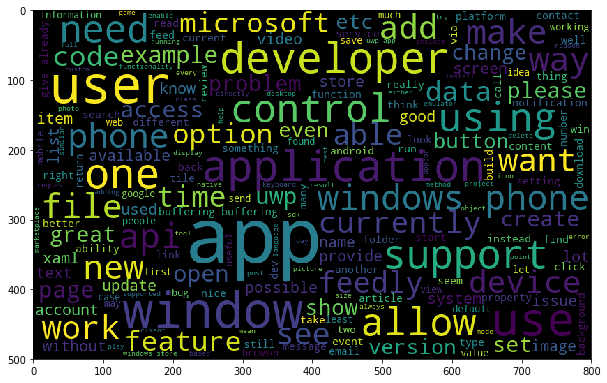

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(filtered_sentence)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.show()

# Creating Sparse Matrix

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = combDf[combDf["Prediction"].isin([0,1])] 
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=3000, stop_words='english')
bow = tfidf_vectorizer.fit_transform(df['New'])
print(df.shape)
print(bow.shape)
df.head()

(8500, 4)
(8500, 3000)


ID                                           Sentence  Prediction  \
0  663_3  "please enable removing language code from the...           1   
1  663_4  "note: in your .csproj file, there is a suppor...           0   
2  664_1  "wich means the new version not fully replaced...           0   
3  664_2  "some of my users will still receive the old x...           0   
4  664_3  "the store randomly gives the old xap or the n...           0   

                                                 New  
0   please enable removing language code from the...  
1   note   your csproj file there     supportedcu...  
2   wich means the new version not fully replaced...  
3   some     users will still receive the old xap...  
4   the store randomly gives the old xap   the ne...

In [24]:
df.sample(10)
df.shape
df.describe(include=["O"])
# df.head()
df["Sentence"].isnull().sum()
df.info()
df["Prediction"].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8500 entries, 0 to 8499
Data columns (total 4 columns):
ID            8500 non-null object
Sentence      8500 non-null object
Prediction    8500 non-null int64
New           8500 non-null object
dtypes: int64(1), object(3)
memory usage: 332.0+ KB


array([1, 0], dtype=int64)

# Creating Baseline model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
X = bow
y = df["Prediction"]

In [26]:
model = XGBClassifier()
n_estimators = [int(x) for x in np.linspace(start=1, stop=200, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'eta': [x for x in np.linspace(start=0.01, stop=0.2, num = 4)],
               'min_child_weight ': [int(x) for x in np.linspace(start=1, stop=11, num = 4)],
               'max_depth ': [int(x) for x in np.linspace(start=3, stop=10, num = 4)],
               'gamma': [int(x) for x in np.linspace(start=0, stop=10, num = 4)],
               'subsample': [x for x in np.linspace(start=0.5, stop=1, num = 4)]}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_random.fit(X_train, y_train)
rf_random.best_params_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future thi

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future thi

{'subsample': 0.5,
 'min_child_weight ': 7,
 'max_depth ': 7,
 'gamma': 0,
 'eta': 0.2}

In [27]:
print(Test.sample(10))
bow = tfidf_vectorizer.transform(Test[1])
A = bow

          0                                                  1  2
81   136115  "Like Android we need Phone level events like ...  5
571   16451  "It's very hard to create application supporti...  5
200   14439  "Allow the BackgroundAudioPlayer to play track...  5
67    13536  "Please allow the access to Gmail's Todo list ...  5
258   15008  "Start by expanding the number of apps that ca...  5
511   16275  "It would be great if you could start an app w...  5
293   15361  "I need a posibility to set the keyboard langu...  5
92    13742  "i could imagine, that in the same way the sms...  5
363   15732  "If something is unresponsive, it should not b...  5
542   16347  "by benchmarking a developer a good developer ...  5


In [28]:
B=pd.read_csv("SubtaskA_Trial_Test_Labeled.csv",encoding = "ISO-8859-1")
B.head()
B=B["label"]
B.head()

0    1
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [29]:
model = XGBClassifier(**rf_random.best_params_)
model.fit(X_train, y_train)
print(model.score(A,B))
yp = model.predict(A)
cm = confusion_matrix(yp,B)
y_test[y_test==1].count()
cm

0.6216216216216216


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[273, 201],
       [ 23,  95]], dtype=int64)

# Classification based on threshold

In [30]:
threshold = 0.2
yp2_prob = model.predict_proba(A)
yp2 = (yp2_prob [:,1] >= threshold).astype('int')
cm = confusion_matrix(yp2, B)
y_test[y_test==1].count()
cm

array([[196,  82],
       [100, 214]], dtype=int64)

In [31]:
EvalPridct=combDf[combDf["Prediction"].isin([6])]
print(EvalPridct.shape)
EvalPridct.head()

(833, 4)


ID                                           Sentence  Prediction  \
9092  9566         this would enable live traffic aware apps.           6   
9093  9569  please try other formatting like bold italics ...           6   
9094  9576  since computers were invented to save time i s...           6   
9095  9577  allow rearranging if the user wants to change ...           6   
9096  9579  add simd instructions for better use of arm ne...           6   

                                                    New  
9092         this would enable live traffic aware apps   
9093  please try other formatting like bold italics ...  
9094  since computers were invented   save time   su...  
9095  allow rearranging   the user wants   change them   
9096  add simd instructions for better use   arm neo...

In [32]:
bowEval = tfidf_vectorizer.transform(EvalPridct["New"])
bowEval.shape

(833, 3000)

In [33]:
yp1 = model.predict(bowEval)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:
a=Eval[0]
b=Eval[1]
sub=pd.DataFrame({
    "Id":a,
    "sentence":b,
    "Prediction":yp1
})
sub.to_csv('submission.csv',index=False,header=False)